In [2]:
# Neezcha Dinman
# ICS 483
# Homework 3

In [90]:
# imports

import numpy
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [4]:
####   1   ####

In [44]:
# 1a 
# write your own gaussian function
# scaled_images = my_gaussian_pyramid(image, scale_factor,n_scales, sigma)

In [43]:
# compute the maximum number of scales (max_scales) given the image size and the downscale factor, 
# and set the number of scales of the pyramid as min(max_scales, n_scals). 
# That is, the number of scales in the output pyramid becomes
# max_scales if n_scales > max_scales.

#  gaussian_filter function in the SciPy library for smoothing. However, you
# should implement your own version of down-sampling with given scaling factor.

In [145]:
def scaled_images (image, *args, **kwargs):
    #default values
    scale_factor = kwargs.get('scale_factor', 2)
    n_scales = kwargs.get('n_scales', 5)
    sig = kwargs.get('sigma',  (2 * scale_factor / 6.0) )
    
    # import image 
    img = mpimg.imread(image)
    yM, xN= img.shape
  
    # output image 
    pyramidImg = numpy.zeros( ((2 *yM), (2 * xN)) )
    pyramidImg[0:yM, 0:xN] = img #origional input image 
    
    smallImg = img
    prevY, prevX = 0, xN    
    for x in range(n_scales): 
        # removes high frequency component of the image
        imgGaus = gaussian_filter(smallImg, sigma=sig) 
        # down sample
        imgDown = imgGaus[::scale_factor, ::scale_factor]
        # display, place in pyramidImg with offset
        smallY, smallX = imgDown.shape
        pyramidImg[prevY:smallY,prevX:(smallX+prevX)] = imgDown
        prevY, prevX = smallY, smallX
        smallImg = imgDown
        
    plt.imshow(pyramidImg, cmap='gray')
    
    return sig

In [146]:
img = mpimg.imread('butterfly.png')
yM, xN= img.shape
xN = 2 * xN
pyramidImg = numpy.zeros( (xN ,yM) )
pyramidImg.shape
imgGaus = gaussian_filter(img, sigma=.66) 
imgDown = imgGaus[::2, ::2]
imgDown.shape # (240, 299)
imgGaus.shape # (479, 598)

(479, 598)

In [124]:
# 1b
# butterfly _pyramid_sf2.jpg 
# butterfly_pyramid_sf3_sigma5.jpg

In [147]:
scaled_images('butterfly.png')

ValueError: could not broadcast input array from shape (120,150) into shape (0,150)

5

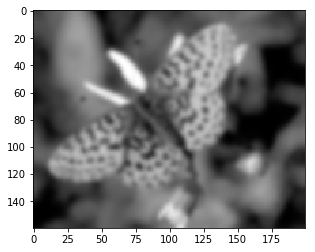

In [72]:
scaled_images('butterfly.png', scale_factor=3, n_scales=10, sigma=5)

In [68]:
# 1c
# sobel function in scikit-image library
# convolve each image in the Gaussian pyramid obtained in 1b
# butterfly _pyramid_edges.jpg

In [ ]:
# 1d
# resize function in scikit-image library
# Resized the resulting gradient magnitude images to match the size of input image
# butterfly_pyramid_edge{n}.jpg whre n is 0-4

In [ ]:
####   2   ####

In [45]:
# 2a

In [ ]:
# Step 1: Compute derivatives of the input image in x- and y-direction --- sigma 1
# Step 2: Construct the second moment matrix M in a Gaussian window around each pixel.
# Step 3: Compute the corner response function --- two options for computing corner response
# Step 4: Threshold the corner response value computed above --- set threshold = thresholding_factor * max_corner_response
# Step 5: Find local maxima of response function (non-maximum suppression)
# Step 6: Display resulting corners ---  show resulting corners as red dots on top of the input image as shown below

In [73]:
def corner_detection (image, *args, **kwargs):
    thresholding =  kwargs.get('thresholding', .1) # used for step 4
    minDist = kwargs.get('minDist', 10)  # used for step 5 minimum distance between corners used for non-maximum suppression
    responce = kwargs.get('responce', 1) # used for Step 3, implement two options for computing corner response:
                                         # (1) 𝑅 = det(𝑀) − 𝛼 ∗ 𝑡𝑟𝑎𝑐𝑒(𝑀) 2. (Set 𝛼 = 0.05 as default value.)
                                         # (2) 𝑅 = det(𝑀) / (𝑡𝑟𝑎𝑐𝑒(𝑀) + 10−6)
    
    # import image 
    img = mpimg.imread(image)
    
    return img

In [74]:
#2b
# apply to butterfly image

In [75]:
corner_detection ('butterfly.png')

array([[0.27058825, 0.27058825, 0.27058825, ..., 0.37254903, 0.38039216,
        0.38431373],
       [0.27058825, 0.27058825, 0.27058825, ..., 0.37254903, 0.38039216,
        0.38431373],
       [0.27058825, 0.27058825, 0.27058825, ..., 0.37254903, 0.38039216,
        0.38431373],
       ...,
       [0.05882353, 0.05882353, 0.05882353, ..., 0.1882353 , 0.1882353 ,
        0.1882353 ],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.19607843, 0.19607843,
        0.19607843],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.21176471, 0.21176471,
        0.21176471]], dtype=float32)

In [ ]:
# 2c 
# apply to butterfly rotated image

In [ ]:
# 2d
# apply to butterfly different sizes